# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_weather = requests.get(city_url).json()
    print(city_weather)
    
   


 # Run an API request for each of the cities
    try:
#         Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        print(city_lat)
        city_lng = city_weather['coord']['lon']
        print(city_lng)
        city_max_temp = city_weather['main']['temp_max']
        print(city_max_temp)
        city_humidity = city_weather['main']['humidity']
        print(city_humidity)
        city_clouds = city_weather['clouds']['all']
        print(city_clouds)
        city_wind = city_weather['wind']['speed']
        print(city_wind)
        city_country = city_weather['sys']['country']
        print(city_country)
        city_date = city_weather['dt']
        print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 240.49, 'feels_like': 240.49, 'temp_min': 240.49, 'temp_max': 240.49, 'pressure': 1025, 'humidity': 99, 'sea_level': 1025, 'grnd_level': 1018}, 'visibility': 5575, 'wind': {'speed': 1.29, 'deg': 343, 'gust': 1.27}, 'clouds': {'all': 97}, 'dt': 1676957951, 'sys': {'country': 'RU', 'sunrise': 1676925965, 'sunset': 1676955550}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
69.7008
170.3133
240.49
99
97
1.29
RU
1676957951
Processing Record 2 of Set 1 | visnes
{'coord': {'lon': 5.2242, 'lat': 59.3556}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 279.18, 'feels_like': 275.95, 'temp_min': 279.16, 'temp_max': 279.38, 'pressu

{'coord': {'lon': 39.5, 'lat': 39.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 274.76, 'feels_like': 274.76, 'temp_min': 274.76, 'temp_max': 274.76, 'pressure': 1016, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1676958208, 'sys': {'type': 1, 'id': 6991, 'country': 'TR', 'sunrise': 1676952456, 'sunset': 1676991846}, 'timezone': 10800, 'id': 315372, 'name': 'Erzincan Province', 'cod': 200}
39.75
39.5
274.76
80
75
1.03
TR
1676958208
Processing Record 16 of Set 1 | kokopo
{'coord': {'lon': 152.2633, 'lat': -4.352}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.67, 'feels_like': 303.96, 'temp_min': 300.67, 'temp_max': 300.67, 'pressure': 1006, 'humidity': 79, 'sea_level': 1006, 'grnd_level': 996}, 'visibility': 8721, 'wind': {'speed': 1.84, 'deg': 322, 'gust': 2.52

{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.29, 'feels_like': 299.29, 'temp_min': 298.83, 'temp_max': 299.29, 'pressure': 1017, 'humidity': 94}, 'visibility': 6000, 'wind': {'speed': 7.2, 'deg': 50}, 'rain': {'1h': 0.25}, 'clouds': {'all': 75}, 'dt': 1676957663, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1676944986, 'sunset': 1676990553}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
-20.3428
57.7575
299.29
94
75
7.2
MU
1676957663
Processing Record 30 of Set 1 | mabaruma
{'coord': {'lon': -59.7833, 'lat': 8.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.65, 'feels_like': 296.12, 'temp_min': 295.65, 'temp_max': 295.65, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed':

-13.2
49.05
300.92
76
99
0.14
MG
1676957607
Processing Record 45 of Set 1 | castro
{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.56, 'feels_like': 288.74, 'temp_min': 288.56, 'temp_max': 288.56, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 902}, 'visibility': 8051, 'wind': {'speed': 0.95, 'deg': 40, 'gust': 1}, 'clouds': {'all': 93}, 'dt': 1676957670, 'sys': {'country': 'BR', 'sunrise': 1676970615, 'sunset': 1677016648}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
-24.7911
-50.0119
288.56
99
93
0.95
BR
1676957670
Processing Record 46 of Set 1 | provideniya
{'coord': {'lon': -173.3, 'lat': 64.3833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 261.21, 'feels_like': 254.21, 'temp_min': 261.21, 'temp_max': 261.21, 'pressure': 1024, 'humid

46.4333
26.4
282.66
78
88
7.02
RO
1676957678
Processing Record 8 of Set 2 | barra patuca
{'coord': {'lon': -84.2833, 'lat': 15.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.75, 'feels_like': 297.33, 'temp_min': 296.75, 'temp_max': 296.75, 'pressure': 1016, 'humidity': 83, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.38, 'deg': 70, 'gust': 3.69}, 'clouds': {'all': 0}, 'dt': 1676957678, 'sys': {'country': 'HN', 'sunrise': 1676894404, 'sunset': 1676936521}, 'timezone': -21600, 'id': 3614835, 'name': 'Barra Patuca', 'cod': 200}
15.8
-84.2833
296.75
83
0
2.38
HN
1676957678
Processing Record 9 of Set 2 | vila franca do campo
{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.38, 'feels_like': 286.9, 'temp_min': 287.38, 'temp_max': 287.38, 'pressur

62.2266
-6.589
277.66
73
100
4.74
FO
1676957686
Processing Record 21 of Set 2 | dikson
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 263.52, 'feels_like': 258.52, 'temp_min': 263.52, 'temp_max': 263.52, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 1002}, 'visibility': 1618, 'wind': {'speed': 2.65, 'deg': 347, 'gust': 3.23}, 'clouds': {'all': 100}, 'dt': 1676957686, 'sys': {'country': 'RU', 'sunrise': 1676949365, 'sunset': 1676975236}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
73.5069
80.5464
263.52
96
100
2.65
RU
1676957686
Processing Record 22 of Set 2 | san pablo
{'coord': {'lon': 121.3258, 'lat': 14.0669}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.76, 'feels_like': 299.76, 'temp_min': 299.76, 'temp_max': 299.76, 'pressure':

34.6391
-120.4579
284.7
88
64
0.45
US
1676957695
Processing Record 34 of Set 2 | talnakh
{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 257.71, 'feels_like': 250.71, 'temp_min': 257.71, 'temp_max': 257.71, 'pressure': 1018, 'humidity': 95, 'sea_level': 1018, 'grnd_level': 1009}, 'visibility': 210, 'wind': {'speed': 3.71, 'deg': 123, 'gust': 5.46}, 'snow': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1676957695, 'sys': {'type': 2, 'id': 49144, 'country': 'RU', 'sunrise': 1676945477, 'sunset': 1676975355}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
69.4865
88.3972
257.71
95
100
3.71
RU
1676957695
Processing Record 35 of Set 2 | ponta delgada
{'coord': {'lon': -25.6667, 'lat': 37.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 287.55, 'feels_like': 287.34, 'temp

71.6872
128.8694
254.79
86
100
4.85
RU
1676957703
Processing Record 47 of Set 2 | escarcega
{'coord': {'lon': -90.7454, 'lat': 18.6089}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.65, 'feels_like': 293.51, 'temp_min': 293.65, 'temp_max': 293.65, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.08, 'deg': 143, 'gust': 7.52}, 'clouds': {'all': 0}, 'dt': 1676957704, 'sys': {'country': 'MX', 'sunrise': 1676896095, 'sunset': 1676937933}, 'timezone': -21600, 'id': 3527795, 'name': 'Escárcega', 'cod': 200}
18.6089
-90.7454
293.65
67
0
2.08
MX
1676957704
Processing Record 48 of Set 2 | broome
{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.23, 'feels_like': 270.87, 'temp_min': 272.58, 'temp_max': 275.94, 'pressure': 98

-53.15
-70.9167
286.21
67
75
12.35
CL
1676957710
Processing Record 10 of Set 3 | vanimo
{'coord': {'lon': 141.3028, 'lat': -2.6741}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.98, 'feels_like': 305.57, 'temp_min': 300.98, 'temp_max': 300.98, 'pressure': 1007, 'humidity': 85, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.87, 'deg': 292, 'gust': 4.05}, 'clouds': {'all': 100}, 'dt': 1676957711, 'sys': {'country': 'PG', 'sunrise': 1676925794, 'sunset': 1676969646}, 'timezone': 36000, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}
-2.6741
141.3028
300.98
85
100
2.87
PG
1676957711
Processing Record 11 of Set 3 | micheweni
{'coord': {'lon': 39.8333, 'lat': -4.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.99, 'feels_like': 301.97, 'temp_min': 299.99, 'temp_max': 299.99, 'pressur

{'coord': {'lon': -73.1667, 'lat': -38.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 283.29, 'feels_like': 282.55, 'temp_min': 283.29, 'temp_max': 283.29, 'pressure': 1014, 'humidity': 84, 'sea_level': 1014, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 0.42, 'deg': 97, 'gust': 0.69}, 'clouds': {'all': 34}, 'dt': 1676957719, 'sys': {'country': 'CL', 'sunrise': 1676975257, 'sunset': 1677023120}, 'timezone': -10800, 'id': 3896774, 'name': 'Carahue', 'cod': 200}
-38.7
-73.1667
283.29
84
34
0.42
CL
1676957719
Processing Record 25 of Set 3 | kyaikto
{'coord': {'lon': 97.0167, 'lat': 17.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 304.58, 'feels_like': 304.18, 'temp_min': 304.58, 'temp_max': 304.58, 'pressure': 1012, 'humidity': 37, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed':

{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 250.91, 'feels_like': 245.11, 'temp_min': 250.91, 'temp_max': 250.91, 'pressure': 1016, 'humidity': 95, 'sea_level': 1016, 'grnd_level': 1012}, 'visibility': 9420, 'wind': {'speed': 1.86, 'deg': 336, 'gust': 1.89}, 'clouds': {'all': 100}, 'dt': 1676957728, 'sys': {'country': 'GL', 'sunrise': 1676988867, 'sunset': 1677007685}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
77.484
-69.3632
250.91
95
100
1.86
GL
1676957728
Processing Record 40 of Set 3 | freetown
{'coord': {'lon': -13.2299, 'lat': 8.484}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.76, 'feels_like': 297.42, 'temp_min': 296.76, 'temp_max': 296.76, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'s

{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 249.15, 'feels_like': 242.15, 'temp_min': 249.15, 'temp_max': 249.15, 'pressure': 1029, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 260}, 'clouds': {'all': 100}, 'dt': 1676957735, 'sys': {'type': 1, 'id': 942, 'country': 'CA', 'sunrise': 1676912315, 'sunset': 1676942011}, 'timezone': -25200, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
69.4541
-133.0374
249.15
77
100
4.63
CA
1676957735
Processing Record 4 of Set 4 | saint-augustin
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.98, 'feels_like': 272.98, 'temp_min': 272.98, 'temp_max': 272.98, 'pressure': 990, 'humidity': 99, 'sea_level': 990, 'grnd_level': 990}, 'visibility': 42, 'wind': {'speed': 0.79, 'deg': 173, 'gust': 3.

{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 288.72, 'feels_like': 286.93, 'temp_min': 288.72, 'temp_max': 288.72, 'pressure': 1018, 'humidity': 23, 'sea_level': 1018, 'grnd_level': 889}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 37, 'gust': 7.89}, 'clouds': {'all': 17}, 'dt': 1676957742, 'sys': {'country': 'SD', 'sunrise': 1676954558, 'sunset': 1676996862}, 'timezone': 7200, 'id': 371745, 'name': 'Kutum', 'cod': 200}
14.2
24.6667
288.72
23
17
4.05
SD
1676957742
Processing Record 17 of Set 4 | wuning
{'coord': {'lon': 120.2311, 'lat': 29.2589}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 283.99, 'feels_like': 282.28, 'temp_min': 283.99, 'temp_max': 283.99, 'pressure': 1032, 'humidity': 44, 'sea_level': 1032, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 3.43

{'coord': {'lon': -49.2647, 'lat': -8.2578}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 295.27, 'feels_like': 296.02, 'temp_min': 295.27, 'temp_max': 295.27, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 339, 'gust': 1.08}, 'rain': {'1h': 0.5}, 'clouds': {'all': 99}, 'dt': 1676957750, 'sys': {'country': 'BR', 'sunrise': 1676971273, 'sunset': 1677015632}, 'timezone': -10800, 'id': 3401845, 'name': 'Conceição do Araguaia', 'cod': 200}
-8.2578
-49.2647
295.27
95
99
1.01
BR
1676957750
Processing Record 30 of Set 4 | coronado
{'coord': {'lon': -117.1831, 'lat': 32.6859}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.3, 'feels_like': 284.71, 'temp_min': 282.86, 'temp_max': 287.66, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 0.

-25.1667
45.05
304.91
48
10
1.66
MG
1676957757
Processing Record 42 of Set 4 | lukovetskiy
{'coord': {'lon': 41.9211, 'lat': 64.2956}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 252.76, 'feels_like': 245.76, 'temp_min': 252.76, 'temp_max': 252.76, 'pressure': 1010, 'humidity': 100, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 6724, 'wind': {'speed': 2.74, 'deg': 65, 'gust': 8.82}, 'clouds': {'all': 93}, 'dt': 1676957758, 'sys': {'country': 'RU', 'sunrise': 1676955018, 'sunset': 1676988122}, 'timezone': 10800, 'id': 533418, 'name': 'Lukovetskiy', 'cod': 200}
64.2956
41.9211
252.76
100
93
2.74
RU
1676957758
Processing Record 43 of Set 4 | kruisfontein
{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 287.53, 'feels_like': 286.98, 'temp_min': 287.53, 'temp_max': 287.53, 'pressur

{'coord': {'lon': 83.2667, 'lat': 17.65}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 304.33, 'feels_like': 305.67, 'temp_min': 304.33, 'temp_max': 304.33, 'pressure': 1015, 'humidity': 48}, 'visibility': 3500, 'wind': {'speed': 2.06, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1676957767, 'sys': {'type': 1, 'id': 9255, 'country': 'IN', 'sunrise': 1676940666, 'sunset': 1676982629}, 'timezone': 19800, 'id': 1252783, 'name': 'Yārāda', 'cod': 200}
17.65
83.2667
304.33
48
0
2.06
IN
1676957767
Processing Record 7 of Set 5 | cabedelo
{'coord': {'lon': -34.8339, 'lat': -6.9811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.52, 'feels_like': 299.15, 'temp_min': 298.52, 'temp_max': 298.52, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.04, 'deg': 151, 'gust': 7.47}, 'clou

{'coord': {'lon': 132.75, 'lat': -5.6667}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.34, 'feels_like': 304.33, 'temp_min': 301.34, 'temp_max': 301.34, 'pressure': 1008, 'humidity': 71, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.66, 'deg': 326, 'gust': 4}, 'rain': {'1h': 7.29}, 'clouds': {'all': 95}, 'dt': 1676957776, 'sys': {'country': 'ID', 'sunrise': 1676927708, 'sunset': 1676971837}, 'timezone': 32400, 'id': 1623197, 'name': 'Tual', 'cod': 200}
-5.6667
132.75
301.34
71
95
3.66
ID
1676957776
Processing Record 24 of Set 5 | laguna
{'coord': {'lon': -121.4238, 'lat': 38.421}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.47, 'feels_like': 283.35, 'temp_min': 282.62, 'temp_max': 286.46, 'pressure': 1017, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 120}

{'coord': {'lon': -77.2644, 'lat': 21.5453}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.6, 'feels_like': 295.96, 'temp_min': 295.6, 'temp_max': 295.6, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.79, 'deg': 94, 'gust': 5.16}, 'clouds': {'all': 4}, 'dt': 1676957784, 'sys': {'country': 'CU', 'sunrise': 1676979370, 'sunset': 1677020974}, 'timezone': -18000, 'id': 3545841, 'name': 'Nuevitas', 'cod': 200}
21.5453
-77.2644
295.6
79
4
2.79
CU
1676957784
Processing Record 37 of Set 5 | saint-philippe
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 304.92, 'feels_like': 311.92, 'temp_min': 298.21, 'temp_max': 304.92, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed

-20.1
146.2667
300.63
63
99
5.77
AU
1676957792
Processing Record 0 of Set 6 | nanakuli
{'coord': {'lon': -158.1547, 'lat': 21.3906}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 294.57, 'feels_like': 294.93, 'temp_min': 294.12, 'temp_max': 296.73, 'pressure': 1016, 'humidity': 83}, 'visibility': 1609, 'wind': {'speed': 3.09, 'deg': 10}, 'rain': {'1h': 2.2}, 'clouds': {'all': 100}, 'dt': 1676957792, 'sys': {'type': 1, 'id': 7868, 'country': 'US', 'sunrise': 1676912408, 'sunset': 1676953974}, 'timezone': -36000, 'id': 5851349, 'name': 'Nānākuli', 'cod': 200}
21.3906
-158.1547
296.73
83
100
3.09
US
1676957792
Processing Record 1 of Set 6 | quime
{'coord': {'lon': -67.2167, 'lat': -16.9833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.25, 'feels_lik

63.1792
14.6357
268.4
100
100
3.09
SE
1676957800
Processing Record 13 of Set 6 | wagar
{'coord': {'lon': 36.2032, 'lat': 16.1525}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.34, 'feels_like': 297.2, 'temp_min': 297.34, 'temp_max': 297.34, 'pressure': 1012, 'humidity': 53, 'sea_level': 1012, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 3.17, 'deg': 87, 'gust': 3.9}, 'clouds': {'all': 15}, 'dt': 1676957800, 'sys': {'country': 'SD', 'sunrise': 1676951884, 'sunset': 1676994000}, 'timezone': 7200, 'id': 364027, 'name': 'Wagar', 'cod': 200}
16.1525
36.2032
297.34
53
15
3.17
SD
1676957800
Processing Record 14 of Set 6 | nebbi
{'coord': {'lon': 31.0889, 'lat': 2.4783}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.46, 'feels_like': 299.46, 'temp_min': 299.46, 'temp_max': 299.46, 'pressure': 1013, 'humidity': 

-3.8004
102.2655
301.81
64
87
3.34
ID
1676957807
Processing Record 26 of Set 6 | bubaque
{'coord': {'lon': -15.8333, 'lat': 11.2833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 296.22, 'feels_like': 296.57, 'temp_min': 296.22, 'temp_max': 296.22, 'pressure': 1010, 'humidity': 76, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.61, 'deg': 272, 'gust': 3.77}, 'clouds': {'all': 20}, 'dt': 1676957808, 'sys': {'country': 'GW', 'sunrise': 1676964139, 'sunset': 1677006720}, 'timezone': 0, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
11.2833
-15.8333
296.22
76
20
3.61
GW
1676957808
Processing Record 27 of Set 6 | shakhrinau
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 6 | bojnurd
{'coord': {'lon': 57.329, 'lat': 37.4747}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations',

58.3044
52.1675
261.27
93
99
4.53
RU
1676957816
Processing Record 42 of Set 6 | nara
{'coord': {'lon': 135.8049, 'lat': 34.6851}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.79, 'feels_like': 274.3, 'temp_min': 275.26, 'temp_max': 279.77, 'pressure': 1028, 'humidity': 44, 'sea_level': 1028, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 7.56, 'deg': 343, 'gust': 10.9}, 'clouds': {'all': 98}, 'dt': 1676957817, 'sys': {'type': 1, 'id': 8040, 'country': 'JP', 'sunrise': 1676929012, 'sunset': 1676969066}, 'timezone': 32400, 'id': 1855612, 'name': 'Nara', 'cod': 200}
34.6851
135.8049
279.77
44
98
7.56
JP
1676957817
Processing Record 43 of Set 6 | tasiilaq
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 263.24, 'feels_like': 257.89, 'temp_min': 263.24, 'temp_max': 

{'coord': {'lon': 11.2103, 'lat': 45.1921}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.49, 'feels_like': 274.49, 'temp_min': 274.49, 'temp_max': 274.49, 'pressure': 1022, 'humidity': 89, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 0.71, 'deg': 326, 'gust': 0.96}, 'clouds': {'all': 98}, 'dt': 1676958003, 'sys': {'type': 1, 'id': 6776, 'country': 'IT', 'sunrise': 1676959674, 'sunset': 1676998206}, 'timezone': 3600, 'id': 6540973, 'name': 'Cerea', 'cod': 200}
45.1921
11.2103
274.49
89
98
0.71
IT
1676958003
Processing Record 9 of Set 7 | marawi
{'coord': {'lon': 124.2928, 'lat': 7.9986}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.16, 'feels_like': 297.91, 'temp_min': 297.16, 'temp_max': 297.16, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 930}, 'visibility'

{'coord': {'lon': -99.4043, 'lat': 35.412}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 281.98, 'feels_like': 279.92, 'temp_min': 281.14, 'temp_max': 282.53, 'pressure': 1009, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1676958010, 'sys': {'type': 1, 'id': 3969, 'country': 'US', 'sunrise': 1676899134, 'sunset': 1676939049}, 'timezone': -21600, 'id': 4535823, 'name': 'Elk City', 'cod': 200}
35.412
-99.4043
282.53
53
0
3.6
US
1676958010
Processing Record 22 of Set 7 | sabang
{'coord': {'lon': 95.3214, 'lat': 5.8933}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.84, 'feels_like': 303.47, 'temp_min': 300.84, 'temp_max': 300.84, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 6.25, 'deg': 57, 'gust': 6.65}

{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.12, 'feels_like': 304.73, 'temp_min': 301.12, 'temp_max': 301.12, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 6.97, 'deg': 359, 'gust': 7.76}, 'clouds': {'all': 97}, 'dt': 1676958016, 'sys': {'country': 'PH', 'sunrise': 1676930894, 'sunset': 1676973488}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
10.9995
122.6711
301.12
77
97
6.97
PH
1676958016
Processing Record 37 of Set 7 | great yarmouth
{'coord': {'lon': 1.7305, 'lat': 52.6083}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 281.86, 'feels_like': 279.59, 'temp_min': 281.49, 'temp_max': 282.29, 'pressure': 1018, 'humidity': 96, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000

{'coord': {'lon': -104.8333, 'lat': 24.8333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.03, 'feels_like': 283.24, 'temp_min': 285.03, 'temp_max': 285.03, 'pressure': 1017, 'humidity': 37, 'sea_level': 1017, 'grnd_level': 808}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 259, 'gust': 2.9}, 'clouds': {'all': 4}, 'dt': 1676958023, 'sys': {'country': 'MX', 'sunrise': 1676899800, 'sunset': 1676940989}, 'timezone': -21600, 'id': 4011741, 'name': 'Durango', 'cod': 200}
24.8333
-104.8333
285.03
37
4
3.1
MX
1676958023
Processing Record 0 of Set 8 | mayo
{'coord': {'lon': -76.5119, 'lat': 38.8876}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.83, 'feels_like': 282.78, 'temp_min': 280.88, 'temp_max': 285.44, 'pressure': 1002, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 210}, 'clouds': {'all': 1

City not found. Skipping...
Processing Record 15 of Set 8 | alotau
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 16 of Set 8 | khandyga
{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 246.33, 'feels_like': 246.33, 'temp_min': 246.33, 'temp_max': 246.33, 'pressure': 1025, 'humidity': 90, 'sea_level': 1025, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.8, 'deg': 88, 'gust': 1.25}, 'clouds': {'all': 96}, 'dt': 1676958030, 'sys': {'country': 'RU', 'sunrise': 1676932216, 'sunset': 1676965961}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
62.6667
135.6
246.33
90
96
0.8
RU
1676958030
Processing Record 17 of Set 8 | dunedin
{'coord': {'lon': 170.5036, 'lat': -45.8742}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28

{'coord': {'lon': 20.1347, 'lat': 54.675}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.18, 'feels_like': 273.67, 'temp_min': 277.57, 'temp_max': 279.18, 'pressure': 998, 'humidity': 87, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 11.84, 'deg': 302, 'gust': 17.13}, 'clouds': {'all': 99}, 'dt': 1676958036, 'sys': {'type': 1, 'id': 8934, 'country': 'RU', 'sunrise': 1676958542, 'sunset': 1676995054}, 'timezone': 7200, 'id': 485660, 'name': 'Tsimmerbude', 'cod': 200}
54.675
20.1347
279.18
87
99
11.84
RU
1676958036
Processing Record 31 of Set 8 | ishigaki
{'coord': {'lon': 124.1572, 'lat': 24.3448}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.22, 'feels_like': 289.86, 'temp_min': 290.22, 'temp_max': 290.22, 'pressure': 1022, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 11.8

{'coord': {'lon': 29.7333, 'lat': 52.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.49, 'feels_like': 269.75, 'temp_min': 275.49, 'temp_max': 275.49, 'pressure': 991, 'humidity': 80, 'sea_level': 991, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 8.33, 'deg': 285, 'gust': 16.1}, 'clouds': {'all': 95}, 'dt': 1676958042, 'sys': {'country': 'BY', 'sunrise': 1676955988, 'sunset': 1676993001}, 'timezone': 10800, 'id': 10722858, 'name': 'Forsytheganj', 'cod': 200}
52.6333
29.7333
275.49
80
95
8.33
BY
1676958042
Processing Record 47 of Set 8 | huarmey
{'coord': {'lon': -78.1522, 'lat': -10.0681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.14, 'feels_like': 296.84, 'temp_min': 296.14, 'temp_max': 296.14, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, '

{'coord': {'lon': 32.0377, 'lat': -28.783}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 297.34, 'feels_like': 297.96, 'temp_min': 297.34, 'temp_max': 297.34, 'pressure': 1012, 'humidity': 82, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.75, 'deg': 190, 'gust': 11.06}, 'rain': {'1h': 0.28}, 'clouds': {'all': 24}, 'dt': 1676958048, 'sys': {'country': 'ZA', 'sunrise': 1676950679, 'sunset': 1676997204}, 'timezone': 7200, 'id': 962367, 'name': 'Richards Bay', 'cod': 200}
-28.783
32.0377
297.34
82
24
7.75
ZA
1676958048
Processing Record 10 of Set 9 | balsas
{'coord': {'lon': -46.0356, 'lat': -7.5325}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.4, 'feels_like': 296.14, 'temp_min': 295.4, 'temp_max': 295.4, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 982}, 'visibility'

69.4058
86.1778
261.94
95
100
4.68
RU
1676958053
Processing Record 22 of Set 9 | omsukchan
{'coord': {'lon': 155.8, 'lat': 62.5333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 240.35, 'feels_like': 233.44, 'temp_min': 240.35, 'temp_max': 240.35, 'pressure': 1023, 'humidity': 98, 'sea_level': 1023, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 341, 'gust': 1.59}, 'clouds': {'all': 34}, 'dt': 1676958053, 'sys': {'country': 'RU', 'sunrise': 1676927350, 'sunset': 1676961131}, 'timezone': 39600, 'id': 2122493, 'name': 'Omsukchan', 'cod': 200}
62.5333
155.8
240.35
98
34
1.67
RU
1676958053
Processing Record 23 of Set 9 | qasigiannguit
{'coord': {'lon': -51.1922, 'lat': 68.8193}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 255.29, 'feels_like': 248.29, 'temp_min': 255.29, 'temp_max': 255.29, 'pre

46.4856
135.8833
259.14
85
100
5.05
RU
1676958059
Processing Record 40 of Set 9 | saleaula
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 41 of Set 9 | lira
{'coord': {'lon': 32.9097, 'lat': 2.235}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.94, 'feels_like': 299.33, 'temp_min': 299.94, 'temp_max': 299.94, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 4.24, 'deg': 73, 'gust': 8.67}, 'clouds': {'all': 99}, 'dt': 1676958059, 'sys': {'country': 'UG', 'sunrise': 1676952031, 'sunset': 1676995434}, 'timezone': 10800, 'id': 230166, 'name': 'Lira', 'cod': 200}
2.235
32.9097
299.94
27
99
4.24
UG
1676958059
Processing Record 42 of Set 9 | talaya
{'coord': {'lon': 152.75, 'lat': 61.3833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations',

{'coord': {'lon': 87.8167, 'lat': 26.2667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 302.98, 'feels_like': 301.75, 'temp_min': 302.98, 'temp_max': 302.98, 'pressure': 1013, 'humidity': 30, 'sea_level': 1013, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.63, 'deg': 105, 'gust': 1.6}, 'clouds': {'all': 2}, 'dt': 1676958066, 'sys': {'country': 'IN', 'sunrise': 1676940020, 'sunset': 1676981091}, 'timezone': 19800, 'id': 1277836, 'name': 'Bahādurganj', 'cod': 200}
26.2667
87.8167
302.98
30
2
1.63
IN
1676958066
Processing Record 5 of Set 10 | lavrentiya
{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 250.99, 'feels_like': 246.12, 'temp_min': 250.99, 'temp_max': 250.99, 'pressure': 1028, 'humidity': 99, 'sea_level': 1028, 'grnd_level': 1027}, 'visibility': 8097, 'wind': {'spe

10.75
77.2667
302.71
31
13
3.94
IN
1676958072
Processing Record 20 of Set 10 | harper
{'coord': {'lon': -7.7169, 'lat': 4.375}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.86, 'feels_like': 299.78, 'temp_min': 298.86, 'temp_max': 298.86, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 232, 'gust': 1.78}, 'clouds': {'all': 11}, 'dt': 1676958072, 'sys': {'country': 'LR', 'sunrise': 1676961877, 'sunset': 1677005087}, 'timezone': 0, 'id': 2276492, 'name': 'Harper', 'cod': 200}
4.375
-7.7169
298.86
88
11
1.31
LR
1676958072
Processing Record 21 of Set 10 | afmadu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 22 of Set 10 | chirongui
{'coord': {'lon': 45.1483, 'lat': -12.9319}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main':

-22.5325
-52.1675
292.16
97
100
1.64
BR
1676958078
Processing Record 34 of Set 10 | darab
{'coord': {'lon': 54.5444, 'lat': 28.7519}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.01, 'feels_like': 287.25, 'temp_min': 289.01, 'temp_max': 289.01, 'pressure': 1018, 'humidity': 23, 'sea_level': 1018, 'grnd_level': 892}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 192, 'gust': 1.68}, 'clouds': {'all': 4}, 'dt': 1676958078, 'sys': {'country': 'IR', 'sunrise': 1676948139, 'sunset': 1676988941}, 'timezone': 12600, 'id': 137956, 'name': 'Dārāb', 'cod': 200}
28.7519
54.5444
289.01
23
4
1.54
IR
1676958078
Processing Record 35 of Set 10 | cocorit
{'coord': {'lon': -109.9667, 'lat': 27.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.78, 'feels_like': 290.11, 'temp_min': 290.78, 'temp_max': 290.78, 'pressure': 1014, 'hu

{'coord': {'lon': 14.2845, 'lat': -22.116}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 291.84, 'feels_like': 291.83, 'temp_min': 291.84, 'temp_max': 291.84, 'pressure': 1014, 'humidity': 79, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.12, 'deg': 150, 'gust': 2.7}, 'clouds': {'all': 0}, 'dt': 1676958084, 'sys': {'country': 'NA', 'sunrise': 1676955327, 'sunset': 1677001077}, 'timezone': 7200, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}
-22.116
14.2845
291.84
79
0
2.12
NA
1676958084
Processing Record 48 of Set 10 | roros
{'coord': {'lon': 11.3842, 'lat': 62.5747}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 267.06, 'feels_like': 264.37, 'temp_min': 267.06, 'temp_max': 267.06, 'pressure': 1002, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 10}, 'clouds': {'all': 7

-11.0964
-77.6139
296.12
87
93
1.31
PE
1676958089
Processing Record 11 of Set 11 | amderma
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 12 of Set 11 | gumrak
{'coord': {'lon': 44.3824, 'lat': 48.7826}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 270.1, 'feels_like': 263.1, 'temp_min': 269.72, 'temp_max': 270.1, 'pressure': 999, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 220, 'gust': 0}, 'clouds': {'all': 40}, 'dt': 1676958090, 'sys': {'type': 1, 'id': 8973, 'country': 'RU', 'sunrise': 1676952058, 'sunset': 1676989900}, 'timezone': 10800, 'id': 557992, 'name': 'Gumrak', 'cod': 200}
48.7826
44.3824
270.1
86
40
8.05
RU
1676958090
Processing Record 13 of Set 11 | novyye gorki
{'coord': {'lon': 41.0601, 'lat': 56.7253}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'mai

{'coord': {'lon': 105.4635, 'lat': 11.9934}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 308.19, 'feels_like': 307.11, 'temp_min': 308.19, 'temp_max': 308.19, 'pressure': 1010, 'humidity': 26, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.4, 'deg': 38, 'gust': 6.1}, 'clouds': {'all': 62}, 'dt': 1676958096, 'sys': {'country': 'KH', 'sunrise': 1676935069, 'sunset': 1676977572}, 'timezone': 25200, 'id': 1831173, 'name': 'Kampong Cham', 'cod': 200}
11.9934
105.4635
308.19
26
62
5.4
KH
1676958096
Processing Record 27 of Set 11 | rio cuarto
{'coord': {'lon': -64.3499, 'lat': -33.1307}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.02, 'feels_like': 290.4, 'temp_min': 291.02, 'temp_max': 291.19, 'pressure': 1014, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 340}, 'clouds': 

{'coord': {'lon': 127.2667, 'lat': 53.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 261.7, 'feels_like': 257.5, 'temp_min': 261.7, 'temp_max': 261.7, 'pressure': 1025, 'humidity': 83, 'sea_level': 1025, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 198, 'gust': 1.85}, 'clouds': {'all': 42}, 'dt': 1676958102, 'sys': {'country': 'RU', 'sunrise': 1676932752, 'sunset': 1676969425}, 'timezone': 32400, 'id': 2012593, 'name': 'Zeya', 'cod': 200}
53.75
127.2667
261.7
83
42
1.92
RU
1676958102
Processing Record 41 of Set 11 | umm lajj
{'coord': {'lon': 37.2685, 'lat': 25.0213}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 294.76, 'feels_like': 294.44, 'temp_min': 294.76, 'temp_max': 294.76, 'pressure': 1016, 'humidity': 56, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'spee

43.7501
-81.7165
272.33
80
100
4.12
CA
1676958107
Processing Record 4 of Set 12 | safwah
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 5 of Set 12 | veraval
{'coord': {'lon': 70.3667, 'lat': 20.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.01, 'feels_like': 300.97, 'temp_min': 301.01, 'temp_max': 301.01, 'pressure': 1016, 'humidity': 44, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.33, 'deg': 301, 'gust': 4.75}, 'clouds': {'all': 23}, 'dt': 1676958108, 'sys': {'country': 'IN', 'sunrise': 1676943922, 'sunset': 1676985564}, 'timezone': 19800, 'id': 1253237, 'name': 'Verāval', 'cod': 200}
20.9
70.3667
301.01
44
23
4.33
IN
1676958108
Processing Record 6 of Set 12 | bodden town
{'coord': {'lon': -81.25, 'lat': 19.2833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'm

{'coord': {'lon': -121.978, 'lat': 37.7799}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.41, 'feels_like': 282.37, 'temp_min': 280.92, 'temp_max': 286.2, 'pressure': 1016, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1676957880, 'sys': {'type': 2, 'id': 2010355, 'country': 'US', 'sunrise': 1676904711, 'sunset': 1676944307}, 'timezone': -28800, 'id': 5392593, 'name': 'San Ramon', 'cod': 200}
37.7799
-121.978
286.2
72
0
2.06
US
1676957880
Processing Record 19 of Set 12 | anderson
{'coord': {'lon': -82.6499, 'lat': 34.5334}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.46, 'feels_like': 289.18, 'temp_min': 288.59, 'temp_max': 290.14, 'pressure': 1008, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 240, 'gust': 10.29}, 'clouds': {'all': 0}, 'dt': 167

{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 295.93, 'feels_like': 296.67, 'temp_min': 295.93, 'temp_max': 295.93, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.19, 'deg': 240, 'gust': 0.41}, 'clouds': {'all': 38}, 'dt': 1676958119, 'sys': {'country': 'BR', 'sunrise': 1676968411, 'sunset': 1677013687}, 'timezone': -10800, 'id': 3466980, 'name': 'Caravelas', 'cod': 200}
-17.7125
-39.2481
295.93
92
38
0.19
BR
1676958119
Processing Record 34 of Set 12 | bowen
{'coord': {'lon': 148.2333, 'lat': -20.0167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 297.87, 'feels_like': 298.67, 'temp_min': 297.87, 'temp_max': 297.87, 'pressure': 1012, 'humidity': 87, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'win

{'coord': {'lon': 27.7285, 'lat': 64.2273}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 255.18, 'feels_like': 248.72, 'temp_min': 255.18, 'temp_max': 255.18, 'pressure': 1004, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 60}, 'clouds': {'all': 100}, 'dt': 1676958125, 'sys': {'type': 1, 'id': 1344, 'country': 'FI', 'sunrise': 1676958400, 'sunset': 1676991552}, 'timezone': 7200, 'id': 654899, 'name': 'Kajaani', 'cod': 200}
64.2273
27.7285
255.18
85
100
2.57
FI
1676958125
Processing Record 47 of Set 12 | aligudarz
{'coord': {'lon': 49.6949, 'lat': 33.4006}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 271.47, 'feels_like': 268.19, 'temp_min': 271.47, 'temp_max': 271.47, 'pressure': 1023, 'humidity': 58, 'sea_level': 1023, 'grnd_level': 802}, 'visibility': 10000, 'wind': {'speed': 2.45, 'deg': 190, 'gust'

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,240.49,99,97,1.29,RU,1676957951
1,visnes,59.3556,5.2242,279.38,81,40,4.63,NO,1676957951
2,erzin,36.9559,36.2000,284.42,66,6,1.31,TR,1676957952
3,albany,42.6001,-73.9662,276.30,63,94,1.34,US,1676958145
4,bluff,-46.6000,168.3333,285.68,86,99,3.42,NZ,1676957626


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,240.49,99,97,1.29,RU,1676957951
1,visnes,59.3556,5.2242,279.38,81,40,4.63,NO,1676957951
2,erzin,36.9559,36.2000,284.42,66,6,1.31,TR,1676957952
3,albany,42.6001,-73.9662,276.30,63,94,1.34,US,1676958145
4,bluff,-46.6000,168.3333,285.68,86,99,3.42,NZ,1676957626


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

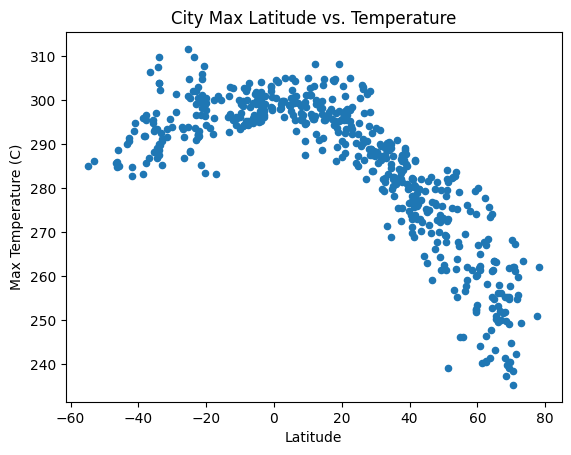

In [49]:
# Build scatter plot for latitude vs. temperature
Fig1 = city_data_df.plot.scatter(x= 'Lat', y= 'Max Temp', title= 'City Max Latitude vs. Temperature')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

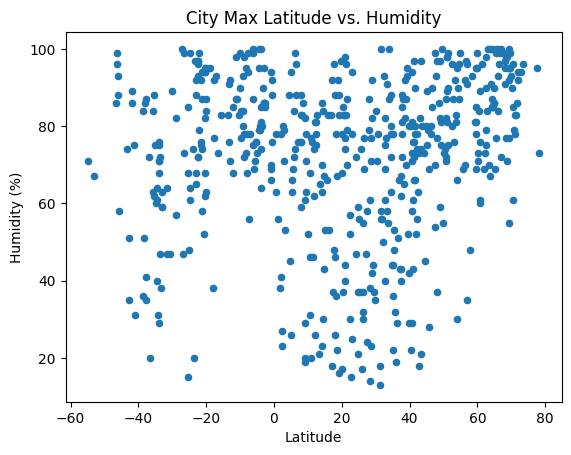

In [48]:
# Build the scatter plots for latitude vs. humidity
Fig2 = city_data_df.plot.scatter(x= 'Lat', y= 'Humidity', title= 'City Max Latitude vs. Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

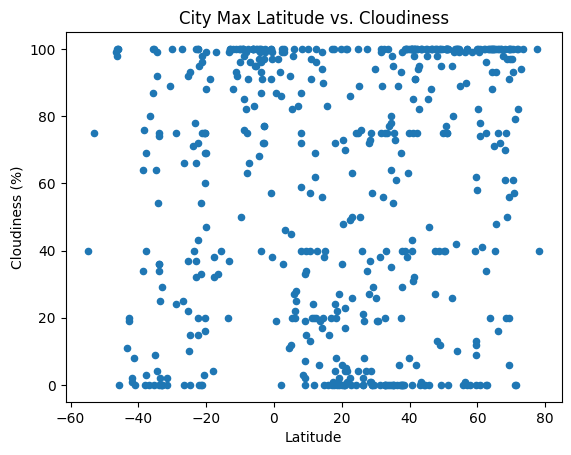

In [47]:
# Build the scatter plots for latitude vs. cloudiness
Fig3 = city_data_df.plot.scatter(x= 'Lat', y= 'Cloudiness', title= 'City Max Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

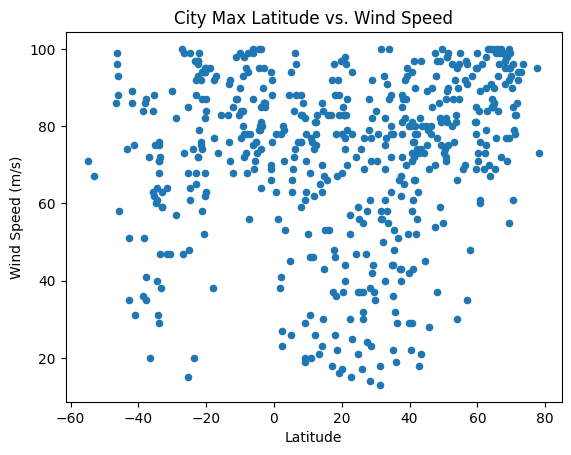

In [46]:
# Build the scatter plots for latitude vs. wind speed
Fig4 = city_data_df.plot.scatter(x= 'Lat', y= 'Humidity', title= 'City Max Latitude vs. Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots


def LinReg(x_values, y_values): 
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")
    plt.show()
 

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,240.49,99,97,1.29,RU,1676957951
1,visnes,59.3556,5.2242,279.38,81,40,4.63,NO,1676957951
2,erzin,36.9559,36.2000,284.42,66,6,1.31,TR,1676957952
3,albany,42.6001,-73.9662,276.30,63,94,1.34,US,1676958145
7,salalah,17.0151,54.0924,300.20,18,0,8.75,OM,1676958094


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bluff,-46.6000,168.3333,285.68,86,99,3.42,NZ,1676957626
5,arraial do cabo,-22.9661,-42.0278,296.74,92,32,7.36,BR,1676957953
6,ancud,-41.8697,-73.8203,282.70,89,1,0.87,CL,1676958205
9,esperance,-33.8667,121.9000,309.83,29,34,7.27,AU,1676958206
10,mahebourg,-20.4081,57.7000,299.31,94,75,7.20,MU,1676958207


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8060036674898975


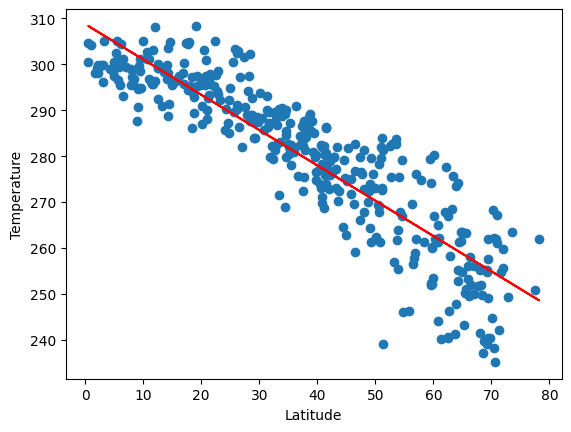

In [89]:
# Linear regression on Northern Hemisphere
LinReg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.23968355433794478


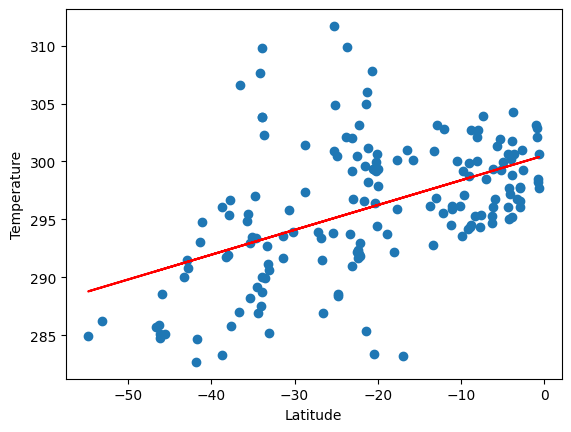

In [91]:
# Linear regression on Southern Hemisphere
LinReg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Maximum temperature increases as cities approach the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16125302890563253


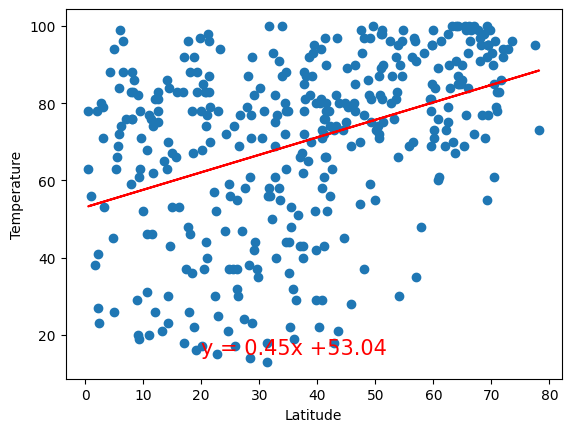

In [92]:
# Northern Hemisphere
LinReg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.23968355433794478


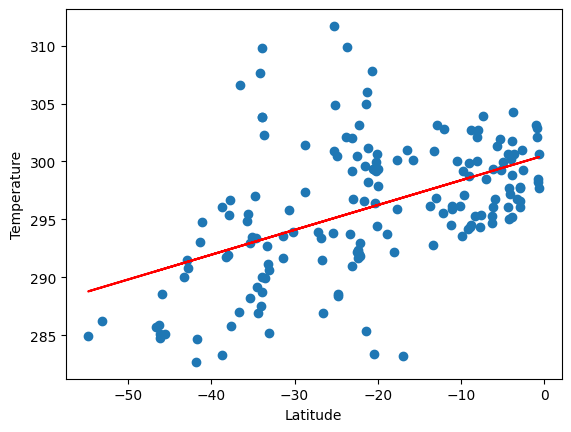

In [93]:
# Southern Hemisphere
LinReg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Humidity increases the further north cities are. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08547625545627517


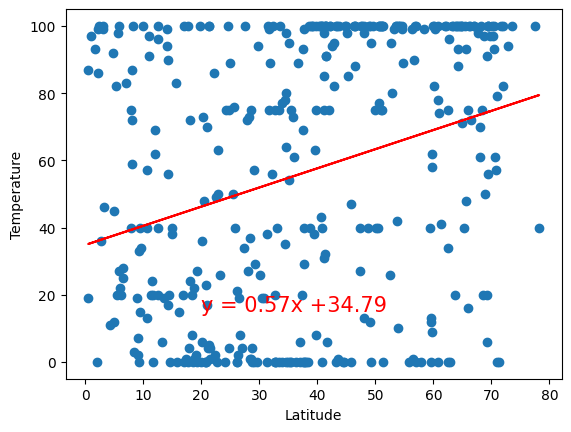

In [94]:
# Northern Hemisphere
LinReg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.22121072061831393


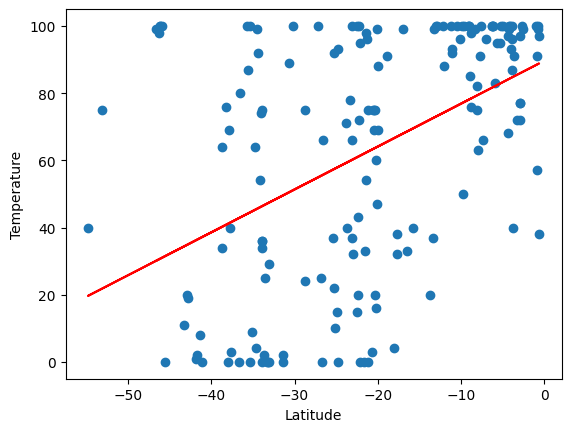

In [95]:
# Southern Hemisphere
LinReg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** Cloudiness increases the further north cities are. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00010893501143991984


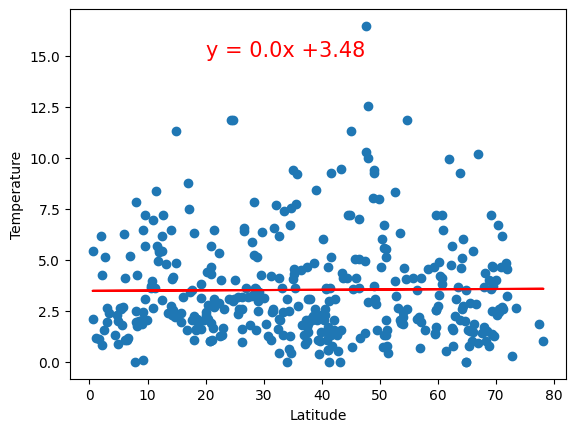

In [96]:
# Northern Hemisphere
LinReg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.1190227887182344


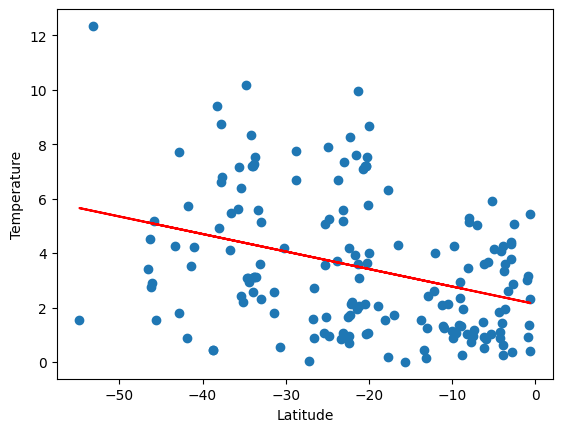

In [97]:
# Southern Hemisphere
LinReg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Wind speed increases as cities move away from the equator. 